In [6]:
import os
import pandas as pd
import numpy as np

BASE_DIR = "./"
DEVICES = ["cpu/", "gpu/"]
IOT_MODELS = ["jetson_nano/", "raspberrypi/", "jetson_orin/", "jetson_xavier/"]

In [7]:
series_sent140 = {}
series_femnist = {}
for iot_model in IOT_MODELS:
    for device in DEVICES:
        path = os.path.join(BASE_DIR, iot_model, device, "split_dfs/")
        if not os.path.exists(path):
            continue

        key_device = "{}_{}".format(iot_model, device).replace("/", "")
        if key_device not in series_sent140:
            series_sent140[key_device] = []
        if key_device not in series_femnist:
            series_femnist[key_device] = []

        epoch = "epch"
        if iot_model == "jetson_xavier/":
            epoch = "epoch"


        df0_sent140 = list(pd.read_csv(os.path.join(path, "0_big_sent140_5{}.csv".format(epoch)))["energon_total_in_power_mW"])
        df1_sent140 = list(pd.read_csv(os.path.join(path, "1_big_sent140_5{}.csv".format(epoch)))["energon_total_in_power_mW"])
        df2_sent140 = list(pd.read_csv(os.path.join(path, "2_big_sent140_5{}.csv".format(epoch)))["energon_total_in_power_mW"])
        df3_sent140 = list(pd.read_csv(os.path.join(path, "3_big_sent140_5{}.csv".format(epoch)))["energon_total_in_power_mW"])
        df4_sent140 = list(pd.read_csv(os.path.join(path, "4_big_sent140_5{}.csv".format(epoch)))["energon_total_in_power_mW"])
        df_sent140 = df0_sent140 + df1_sent140 + df2_sent140 + df3_sent140 + df4_sent140

        df0_femnist = list(pd.read_csv(os.path.join(path, "0_big_femnist_5{}.csv".format(epoch)))["energon_total_in_power_mW"])
        df1_femnist = list(pd.read_csv(os.path.join(path, "1_big_femnist_5{}.csv".format(epoch)))["energon_total_in_power_mW"])
        df2_femnist = list(pd.read_csv(os.path.join(path, "2_big_femnist_5{}.csv".format(epoch)))["energon_total_in_power_mW"])
        df3_femnist = list(pd.read_csv(os.path.join(path, "3_big_femnist_5{}.csv".format(epoch)))["energon_total_in_power_mW"])
        df4_femnist = list(pd.read_csv(os.path.join(path, "4_big_femnist_5{}.csv".format(epoch)))["energon_total_in_power_mW"])
        df_femnist = df0_femnist + df1_femnist + df2_femnist + df3_femnist + df4_femnist

        dots_sent140_y = [df0_sent140[0], df1_sent140[0], df2_sent140[0], df3_sent140[0], df4_sent140[0], df4_sent140[-1]]
        dots_sent140_x = [0, len(df0_sent140)]
        dots_sent140_x.append(len(df0_sent140) + len(df1_sent140))
        dots_sent140_x.append(len(df0_sent140) + len(df1_sent140) + len(df2_sent140))
        dots_sent140_x.append(len(df0_sent140) + len(df1_sent140) + len(df2_sent140) + len(df3_sent140))
        dots_sent140_x.append(len(df0_sent140) + len(df1_sent140) + len(df2_sent140) + len(df3_sent140) + len(df4_sent140))

        dots_femnist_y = [df0_femnist[0], df1_femnist[0], df2_femnist[0], df3_femnist[0], df4_femnist[0], df4_femnist[-1]]
        dots_femnist_x = [0, len(df0_femnist)]
        dots_femnist_x.append(len(df0_femnist) + len(df1_femnist))
        dots_femnist_x.append(len(df0_femnist) + len(df1_femnist) + len(df2_femnist))
        dots_femnist_x.append(len(df0_femnist) + len(df1_femnist) + len(df2_femnist) + len(df3_femnist))
        dots_femnist_x.append(len(df0_femnist) + len(df1_femnist) + len(df2_femnist) + len(df3_femnist) + len(df4_femnist))

        series_sent140[key_device].append((df_sent140, list(range(len(df_sent140)))))
        series_sent140[key_device].append((dots_sent140_y, dots_sent140_x))

        series_femnist[key_device].append((df_femnist, list(range(len(df_femnist)))))
        series_femnist[key_device].append((dots_femnist_y, dots_femnist_x))
  

In [8]:
import matplotlib.font_manager as font_manager
import matplotlib.pyplot as plt
from matplotlib import rcParams

for font in font_manager.findSystemFonts("../grafiche"):
    font_manager.fontManager.addfont(font)
rcParams['font.family'] = 'Palatino'
plt.figure().set_figwidth(15)

colors = ["lightblue", "#fad6a5", "#FF7276", "pink", "purple", "#E7D7AF", "#90EE90", "gray"]
dark_colors =  ["blue", "darkorange", "#B30000", "deeppink","darkviolet", "darkgoldenrod", "green",  "dimgray"]
markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X',]
linestyles = ['-.', ':', 'solid', '--', 'dashed', 'dashdot', 'dotted', '-', '--', '-.', ':',]


<Figure size 1500x480 with 0 Axes>

/tmp/ipykernel_7658/1451783366.py:32: RuntimeWarning: invalid value encountered in power
  r = np.power(x, 1/pow_value)


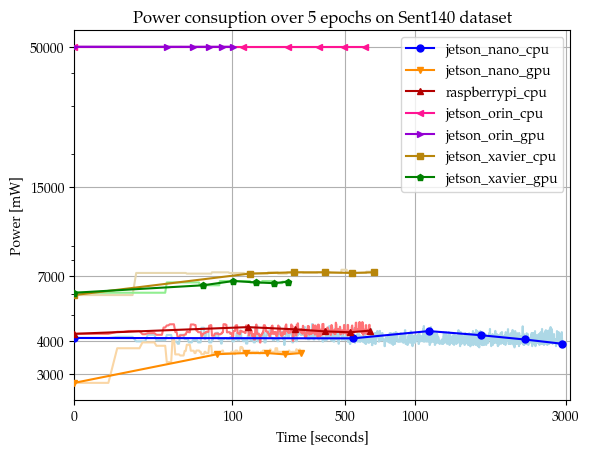

In [9]:
for counter, k in enumerate(series_sent140.keys()):
    # Create the line plots

    # if "orin" in k:
    #     counter -= 1
    #     continue

    y_values = series_sent140[k][0][0]
    x_values = series_sent140[k][0][1]

    highlight_y = series_sent140[k][1][0]
    highlight_x = series_sent140[k][1][1]

    plt.plot(x_values, y_values, color=colors[counter])
    plt.plot(highlight_x, highlight_y, color=dark_colors[counter], zorder=5, marker=markers[counter], markersize=5, label=k)

# Add labels and title
plt.xlabel('Time [seconds]')
plt.ylabel('Power [mW]')
plt.title('Power consuption over 5 epochs on Sent140 dataset')

# Add legend and grid
plt.legend()
plt.grid(True)

plt.gca().set_yscale("functionlog", functions=[lambda x: x * 1, lambda x: x / 1])
plt.gca().set_yticks([3000, 4000, 7000, 15000, 50000])
plt.gca().set_yticklabels([3000, 4000, 7000, 15000, 50000])

pow_value = 3
def custom_transform(x):
    r = np.power(x, 1/pow_value)
    # check if np r array containeys nan
    if np.isnan(r).any():
        # repplace nan with 0
        r = np.nan_to_num(r)
    return r

def custom_inverse_transform(x):
    return np.power(x, pow_value)

plt.gca().set_xscale("function", functions=[custom_transform, custom_inverse_transform])
plt.gca().set_xticks([0, 100, 500, 1000, 3000])
plt.gca().set_xticklabels([0, 100, 500, 1000, 3000])

# Show the plot
plt.show()

/tmp/ipykernel_7658/1639299929.py:34: RuntimeWarning: invalid value encountered in power
  r = np.power(x, 1/pow_value)


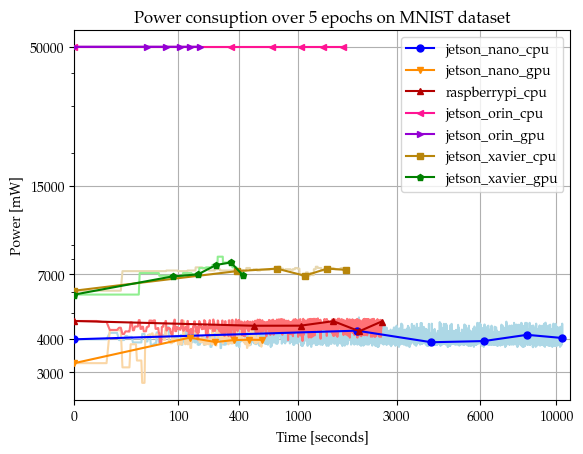

In [11]:
for counter, k in enumerate(series_femnist.keys()):
    # Create the line plots

    # if "orin" in k:
    #     counter -= 1
    #     continue

    y_values = series_femnist[k][0][0]
    x_values = series_femnist[k][0][1]

    highlight_y = series_femnist[k][1][0]
    highlight_x = series_femnist[k][1][1]

    plt.plot(x_values, y_values, color=colors[counter])
    plt.plot(highlight_x, highlight_y, color=dark_colors[counter], zorder=5, marker=markers[counter], markersize=5, label=k)
    # plt.scatter(highlight_x, highlight_y, linestyle=linestyles[counter], color=dark_colors[counter], marker=markers[counter], zorder=5, s=15)


# Add labels and title
plt.xlabel('Time [seconds]')
plt.ylabel('Power [mW]')
plt.title('Power consuption over 5 epochs on MNIST dataset')

# Add legend and grid
plt.legend()
plt.grid(True)

plt.gca().set_yscale("functionlog", functions=[lambda x: x * 10, lambda x: x / 10])
plt.gca().set_yticks([3000, 4000, 7000, 15000, 50000])
plt.gca().set_yticklabels([3000, 4000, 7000, 15000, 50000])

pow_value = 3
def custom_transform(x):
    r = np.power(x, 1/pow_value)
    # check if np r array containeys nan
    if np.isnan(r).any():
        # repplace nan with 0
        r = np.nan_to_num(r)
    return r

def custom_inverse_transform(x):
    return np.power(x, pow_value)

plt.gca().set_xscale("function", functions=[custom_transform, custom_inverse_transform])
plt.gca().set_xticks([0, 100, 400, 1000, 3000, 6000, 10000])
plt.gca().set_xticklabels([0, 100, 400, 1000, 3000, 6000, 10000])

# Show the plot
plt.show()